**Task 6**



1.   Finding the most important ngram elements that impacted the classification for positive and negative classes.
2.  Specify the class for each word or element retrieved

**Additional Steps**
1.   Observe the performance of each model for differnt ngrams using confusion matrix


**Note** : Csv files in **./data/Task 5/Input/** are used as the input files for this sections. 
These files are output from varder sentiment analysis.

Fig. 10, Fig. 11, Tabel V results are obtained from running this code. Refer to the code you can see comments above the exact code segment


 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sasini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sasini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sasini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sasini\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


2963 741 2963 741


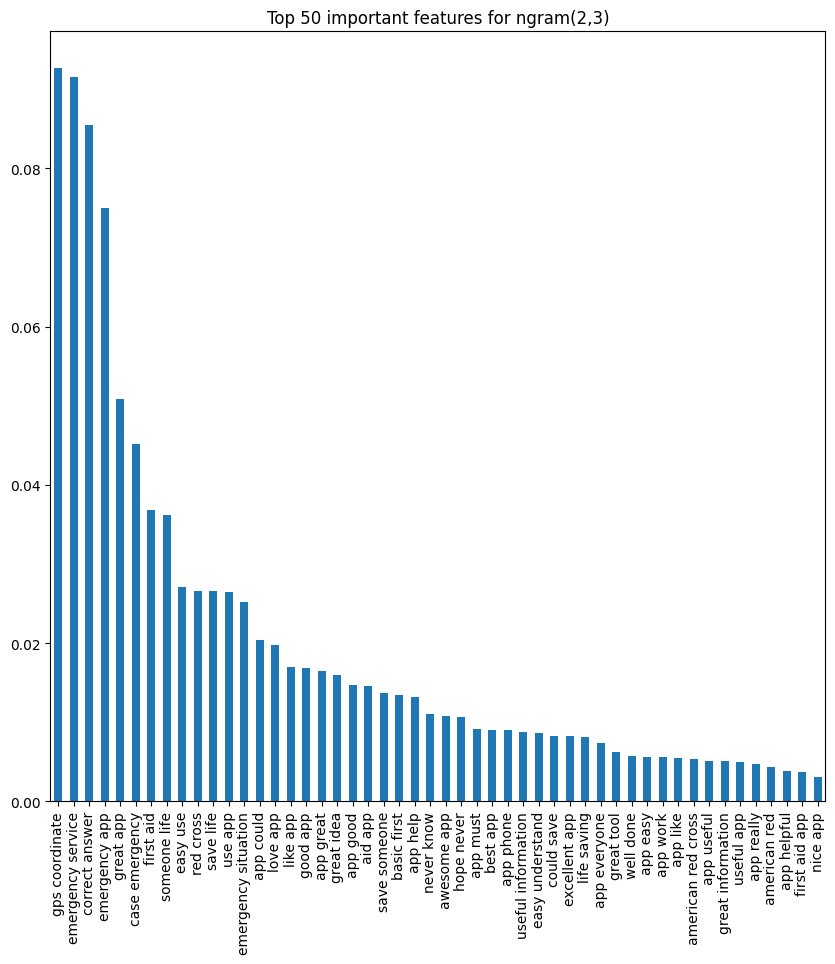

Finding most important Ngrams for ngram(2,3)
Positive ngrams :
['american red', 'american red cross', 'app easy', 'app everyone', 'app good', 'app great', 'app help', 'app helpful', 'app like', 'app must', 'app phone', 'app really', 'app useful', 'app work', 'awesome app', 'basic first', 'best app', 'case emergency', 'could save', 'easy understand', 'easy use', 'emergency situation', 'excellent app', 'first aid', 'first aid app', 'good app', 'great app', 'great idea', 'great information', 'great tool', 'hope never', 'life saving', 'like app', 'love app', 'never know', 'nice app', 'red cross', 'save life', 'use app', 'useful app', 'useful information', 'well done']
Negative ngrams :
['aid app', 'app could', 'correct answer', 'emergency app', 'emergency service', 'gps coordinate', 'save someone', 'someone life']

 Confusion Matrix for ngram(2,3) 

              precision    recall  f1-score   support

          -1       0.58      0.10      0.17       109
           1       0.86      0.99

C:\Users\Sasini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


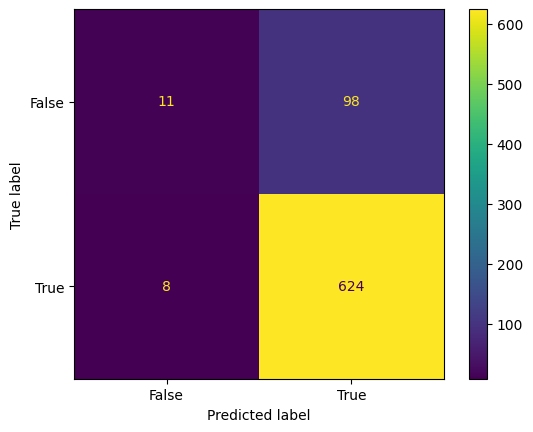

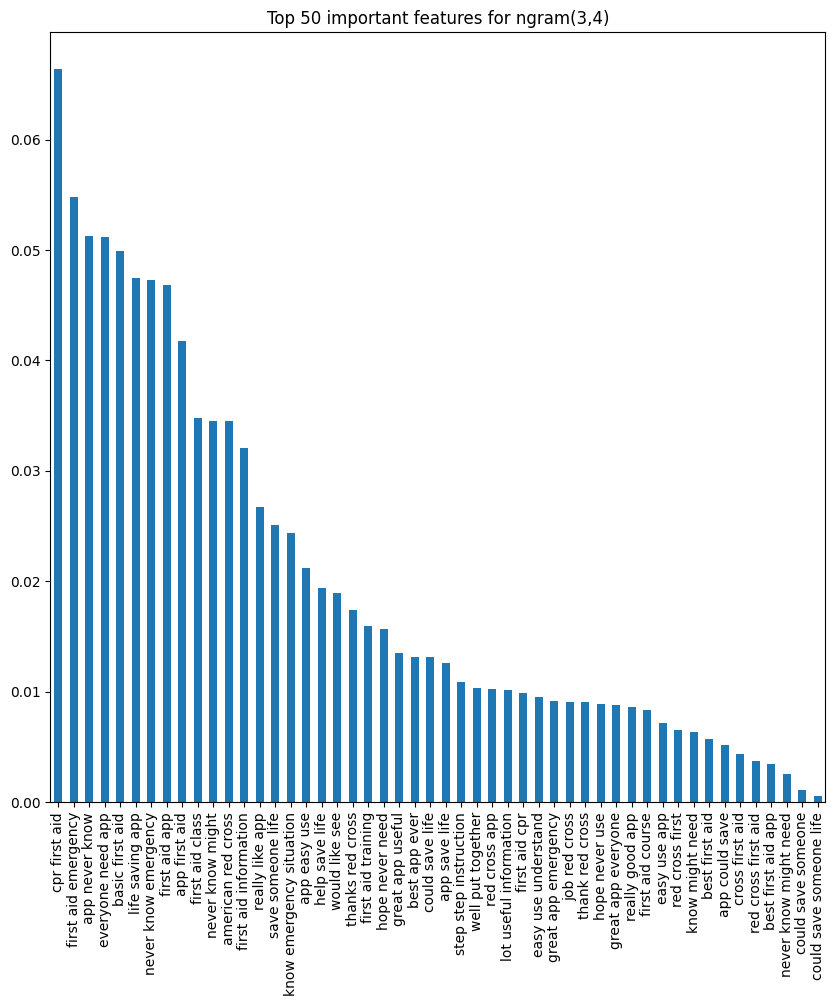

Finding most important Ngrams for ngram(3,4)
Positive ngrams :
['american red cross', 'app could save', 'app easy use', 'app first aid', 'app never know', 'app save life', 'basic first aid', 'best app ever', 'best first aid', 'best first aid app', 'could save life', 'could save someone', 'could save someone life', 'cpr first aid', 'cross first aid', 'easy use app', 'easy use understand', 'everyone need app', 'first aid app', 'first aid class', 'first aid course', 'first aid cpr', 'first aid emergency', 'first aid information', 'first aid training', 'great app emergency', 'great app everyone', 'great app useful', 'help save life', 'hope never need', 'hope never use', 'job red cross', 'know emergency situation', 'know might need', 'life saving app', 'lot useful information', 'never know emergency', 'never know might', 'never know might need', 'really good app', 'really like app', 'red cross app', 'red cross first', 'red cross first aid', 'save someone life', 'step step instruction', 'tha

C:\Users\Sasini\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


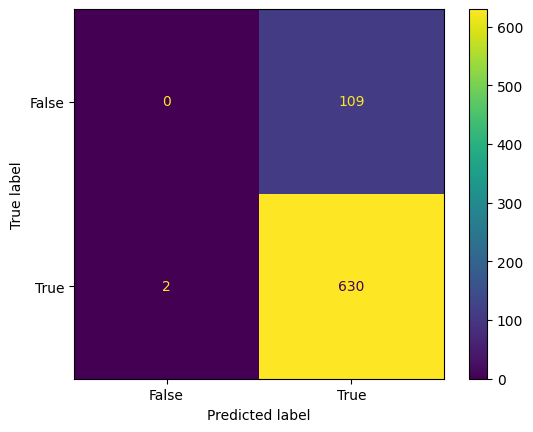

In [3]:
from nltk.tag.sequential import NgramTagger
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel
import numpy as np


nltk.download('stopwords')
nltk.download('punkt')
stopWords = stopwords.words('english')
nltk.download('wordnet')
nltk.download('omw-1.4')

emergencyPlus = pd.read_csv('./data/Task 6/Input/emergencyplus_combined_sentiment.csv')
firstAid = pd.read_csv('./data/Task 6/Input/firstaid_combined_sentiment.csv')
x = pd.concat([emergencyPlus, firstAid])

reviewsPd = x.drop(x[(x['sentiment'] == 0)].index)
lemmatizedReviews=[]

def PreProcessData(reviews):
    wn = nltk.WordNetLemmatizer()
    stopWords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(reviews)
    tokensConvertedToLower = [word.lower() for word in tokens]
    tokensWithoutStopWords = [word for word in tokensConvertedToLower if word not in stopWords]
    no_alpha = [word for word in tokensWithoutStopWords if word.isalpha()]
    lemmatizedText = [wn.lemmatize(word) for word in no_alpha]
    return lemmatizedText

reviews = reviewsPd['Review']
sentiments = reviewsPd['sentiment']

for review in reviews:
   lemmatizedData = PreProcessData(review)
   lemmatizedText = ' '.join(lemmatizedData)
   lemmatizedReviews.append(lemmatizedText)

reviews_train, reviews_test, label_train, label_test = train_test_split(lemmatizedReviews, sentiments, test_size=0.2, random_state=0)  
print(len(reviews_train), len(reviews_test), len(label_train), len(label_test) )

def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

def VectorizeData(x,y):
  vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(x,y),  max_features=50)
  tfidf_vect_fit=vectorizer.fit(reviews_train)
  reviewVectorized=vectorize(reviews_train,tfidf_vect_fit)
  return reviewVectorized, vectorizer,tfidf_vect_fit

def TrainRandomForestClassifier():
  text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
  text_classifier.fit(reviewVectorized, label_train)
  return text_classifier;

# Fig 10 in report is a result from running this command
def PlotFeatureImportance(text_classifier, ngram):
  feat_importances = pd.Series(text_classifier.feature_importances_, index=reviewVectorized.columns)
  feat_importances.sort_values(ascending=True)
  feat_importances.nlargest(50).plot(kind='bar',figsize=(10,10))
  plt.title("Top 50 important features for " + ngram)
  plt.show()

# TabelV in report is a result from running this command
def ClassifyFeatureImportance():
  features = pd.DataFrame()
  features['importance'] = textClassifier.feature_importances_
  features["names"] = reviewVectorized.columns
  features["prediction"] = textClassifier.predict(vectorizer.transform(features["names"]))
  features.to_csv('c.csv', index=None, header=True)
  positiveNgramsDf = features.loc[features['prediction'] == 1]
  negativeNgramsDf = features.loc[features['prediction'] == -1]
  print("Positive ngrams :")
  print(positiveNgramsDf['names'].tolist())
  print("Negative ngrams :")
  print(negativeNgramsDf['names'].tolist())

# Fig 11 in report is a result from running this command
def CreateConfusionMatrix():
  testDataVectorized=vectorize(reviews_test,tfIdfVectFit)
  predictedValues = textClassifier.predict(testDataVectorized)
  print(classification_report(label_test, predictedValues))
  confusionMatrix = confusion_matrix(label_test, predictedValues)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])
  cm_display.plot()
  plt.show()



reviewVectorized, vectorizer, tfIdfVectFit=VectorizeData(2,3)
textClassifier = TrainRandomForestClassifier()
PlotFeatureImportance(textClassifier, ngram ='ngram(2,3)')
print('Finding most important Ngrams for ngram(2,3)')
ClassifyFeatureImportance()
print('\n Confusion Matrix for ngram(2,3) \n')
CreateConfusionMatrix()

reviewVectorized, vectorizer, tfIdfVectFit=VectorizeData(3,4)
textClassifier = TrainRandomForestClassifier()
PlotFeatureImportance(textClassifier, ngram ='ngram(3,4)')
print('Finding most important Ngrams for ngram(3,4)')
ClassifyFeatureImportance()
print('\n Confusion Matrix for ngram(3,4) \n')
CreateConfusionMatrix()
